## **0. Tải bộ dữ liệu**
**Lưu ý:** Nếu bạn không thể sử dụng lệnh gdown để tải bộ dữ liệu vì bị giới hạn số lượt tải, hãy tải bộ dữ liệu thử công và upload lên google drive của mình. Sau đó, sử dụng lệnh dưới đây để copy file dữ liệu vào colab:
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [53]:
# https://drive.google.com/file/d/1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R/view?usp=sharing
!gdown --id 1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R
To: /content/2cls_spam_text_cls.csv
100% 486k/486k [00:00<00:00, 111MB/s]


## **1. Import các thư viện cần thiết**

In [67]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **2. Đọc bộ dữ liệu**

In [55]:
DATASET_PATH = '/content/2cls_spam_text_cls.csv'
df = pd.read_csv(DATASET_PATH)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [56]:
messages = df['Message'].values.tolist()
labels = df['Category'].values.tolist()

## **3. Chuẩn bị bộ dữ liệu**

### **3.1. Xử lý dữ liệu nhãn**

In [57]:
le = LabelEncoder()
y = le.fit_transform(labels)
print(f'Classes: {le.classes_}')
print(f'Encoded labels: {y}')

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


### **3.2. Xử lý dữ liệu đặc trưng**

In [58]:
def lowercase(text):
    return text.lower()

def punctuation_removal(text):
    translator = str.maketrans('', '', string.punctuation)

    return text.translate(translator)

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')

    return [token for token in tokens if token not in stop_words]

def stemming(tokens):
    stemmer = nltk.PorterStemmer()

    return [stemmer.stem(token) for token in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)

    return tokens

In [59]:
messages = [preprocess_text(message) for message in messages]

In [60]:
def create_dictionary(messages):
    dictionary = []

    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)

    return dictionary

def create_features(tokens, dictionary):
    features = np.zeros(len(dictionary))

    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1

    return features

In [61]:
dictionary = create_dictionary(messages)
X = np.array([create_features(tokens, dictionary) for tokens in messages])

### **3.3. Chia dữ liệu train/val/test**

In [62]:
VAL_SIZE = 0.2
TEST_SIZE = 0.125
SEED = 0

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=VAL_SIZE,
                                                  shuffle=True,
                                                  random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    shuffle=True,
                                                    random_state=SEED)

## **4. Huấn luyện mô hình**

In [88]:
%%time
models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]
model_names = ['GaussianNB', 'MultinomialNB', 'ComplementNB', 'BernoulliNB']
trained_models = []

for name, model in zip(model_names, models):
  print(f'Start training {name}')
  model = model.fit(X_train, y_train)
  trained_models.append((name, model))
  print('Training completed!')

Start training GaussianNB
Training completed!
Start training MultinomialNB
Training completed!
Start training ComplementNB
Training completed!
Start training BernoulliNB
Training completed!
CPU times: user 1.11 s, sys: 544 ms, total: 1.66 s
Wall time: 1.83 s


## **5. Đánh giá mô hình**

Model GaussianNB:
Val accuracy: 0.8816143497757848
Test accuracy: 0.8602150537634409


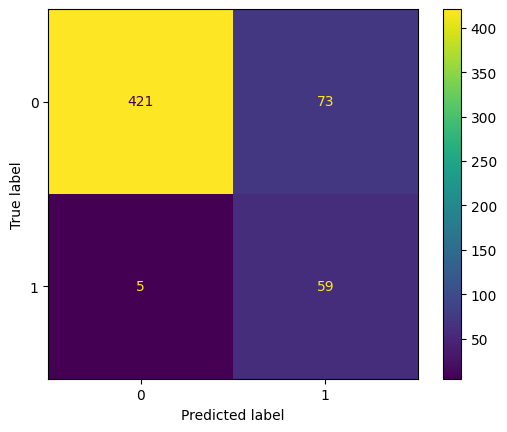

Model MultinomialNB:
Val accuracy: 0.9820627802690582
Test accuracy: 0.9802867383512545


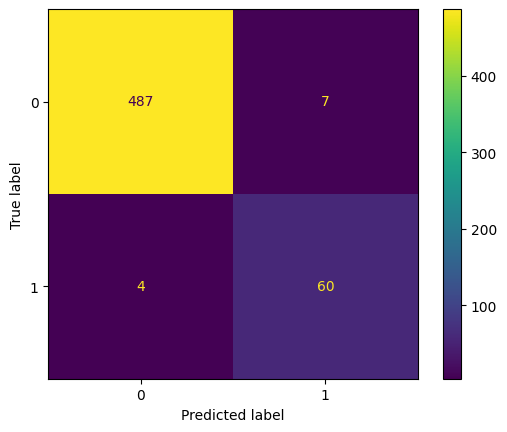

Model ComplementNB:
Val accuracy: 0.9452914798206278
Test accuracy: 0.9372759856630825


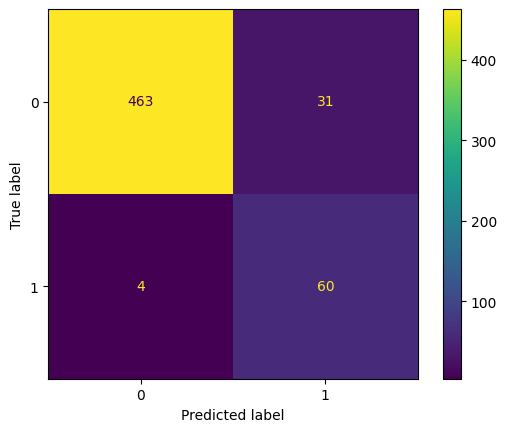

Model BernoulliNB:
Val accuracy: 0.9721973094170404
Test accuracy: 0.9767025089605734


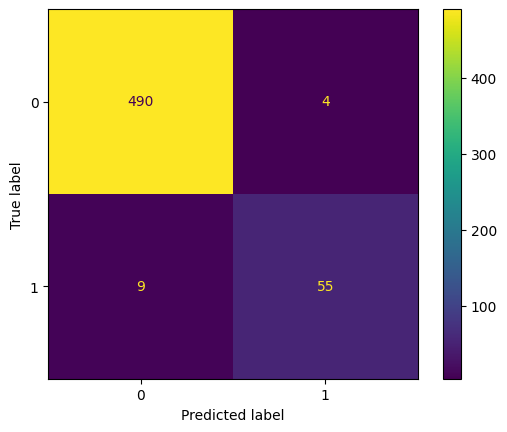

In [89]:
val_accuracies = []
test_accuracies = []

for name, model in trained_models:
  y_val_pred = model.predict(X_val)
  y_test_pred = model.predict(X_test)
  val_accuracy = accuracy_score(y_val, y_val_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  val_accuracies.append(val_accuracy)
  test_accuracies.append(test_accuracy)

  print(f'Model {name}:')
  print(f'Val accuracy: {val_accuracy}')
  print(f'Test accuracy: {test_accuracy}')

  cm = confusion_matrix(y_test, y_test_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

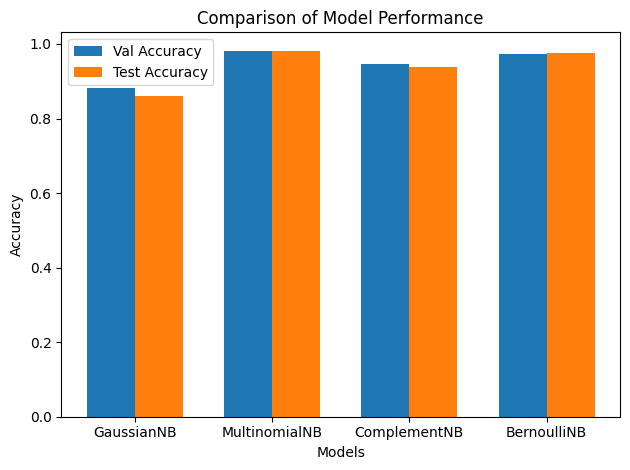

In [91]:
models = ['GaussianNB', 'MultinomialNB', 'ComplementNB', 'BernoulliNB']
bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots()
val_bars = ax.bar(index, val_accuracies, bar_width, label='Val Accuracy')
test_bars = ax.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


## **6. Thực hiện dự đoán**

In [92]:
def predict(text, model, dictionary):
    processed_text = preprocess_text(text)
    features = create_features(text, dictionary)
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    prediction_cls = le.inverse_transform(prediction)[0]

    return prediction_cls

In [93]:
# test_input = 'I am actually thinking a way of doing something useful'
test_input = 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s FreeMsg Hey there darling its been 3 weeks now and no word back! Id like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv'

for name, model in trained_models:
  prediction_cls = predict(test_input, model, dictionary)
  print(f'Model {name}: {prediction_cls}')

Model GaussianNB: ham
Model MultinomialNB: ham
Model ComplementNB: ham
Model BernoulliNB: ham
